In [ ]:
# Exercise
 # Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

#Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
#Plot bar charts showing impact of employee salaries on retention
#Plot bar charts showing corelation between department and employee retention
#Now build logistic regression model using variables that were narrowed down in step 1
#Measure the accuracy of the model #

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [38]:
data=pd.read_csv("/content/HR analytics.zip")

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [40]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
data = data.rename(columns={"Work_accident": "accident", "Department": "department"})

In [42]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
accident                 0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [43]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [44]:
data.shape

(14999, 10)

In [45]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
accident                   int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [46]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [47]:
data.groupby('left').mean()

<ipython-input-47-8c4d5ee330af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


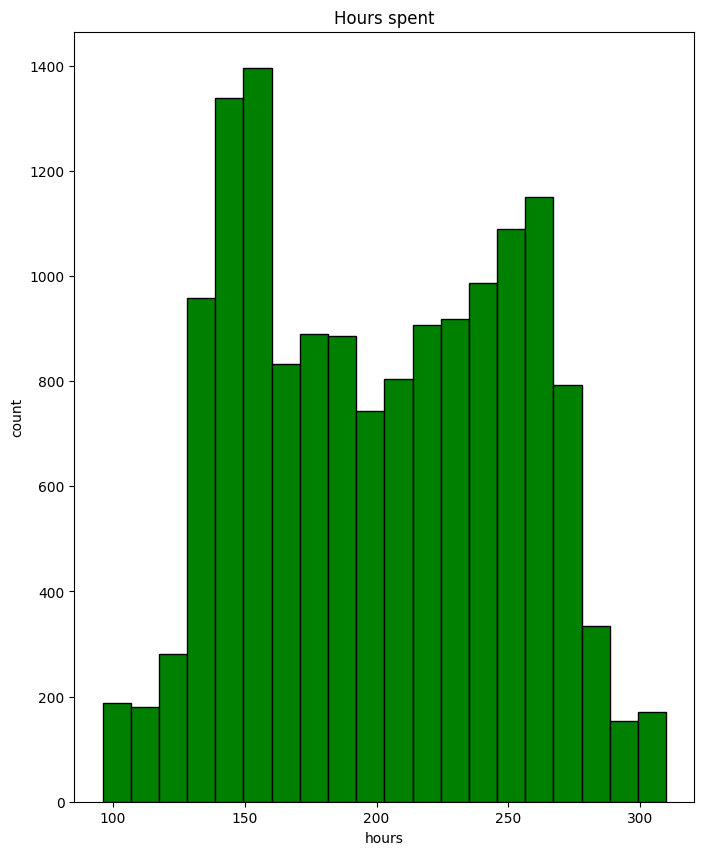

In [48]:
plt.figure(figsize=(8,10))
plt.hist(data['average_montly_hours'], bins=20, color='green', edgecolor='black')
plt.xlabel('hours')
plt.ylabel('count')
plt.title('Hours spent')
plt.show()


In [70]:
column1= 'number_project'
column2= 'average_montly_hours'

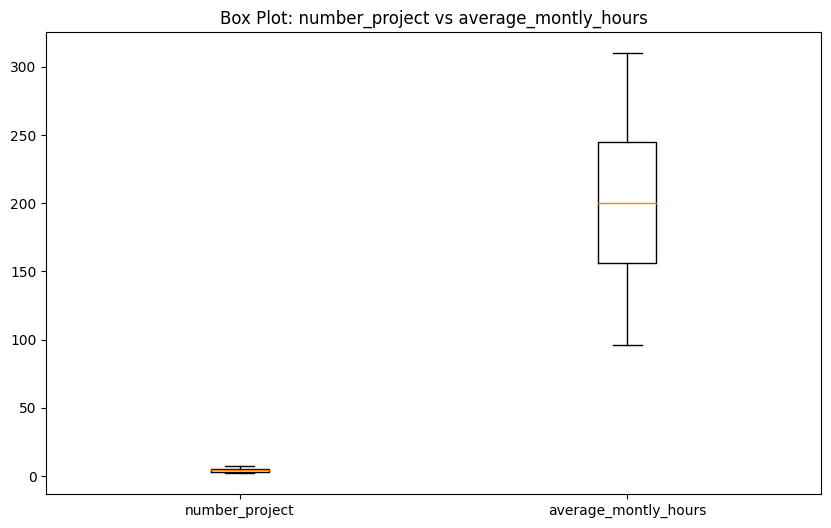

In [84]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[column1], data[column2]])
plt.title('Box Plot: {} vs {}'.format(column1,column2))
plt.xticks([1,2], [column1, column2])
plt.show()
#to find a outlier ,by using box plot


In [85]:
z_scores = np.abs((data - data.mean()) / data.std())
# finding an outlires without using boxplot,

<ipython-input-85-1c9d57000e81>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((data - data.mean()) / data.std())
<ipython-input-85-1c9d57000e81>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((data - data.mean()) / data.std())


In [73]:
threshold = 3

In [75]:
outliers = data[z_scores > threshold]
outliers

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,accident,left,promotion_last_5years,department,salary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#A crosstab allows you to explore the association between variables and identify any patterns or dependencies between them


<Axes: xlabel='salary'>

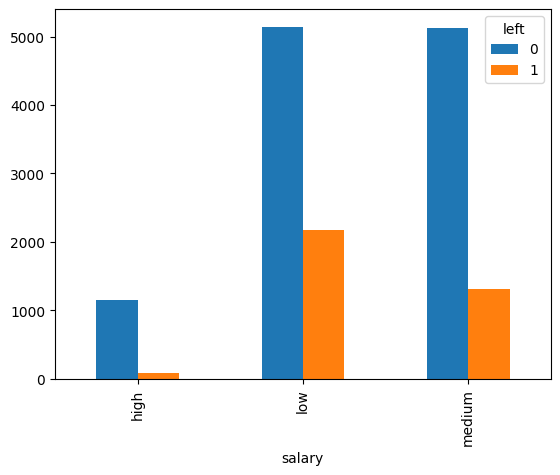

In [82]:
pd.crosstab(data.salary,data.left).plot(kind='bar') #employee retention rate on salary


<Axes: xlabel='department'>

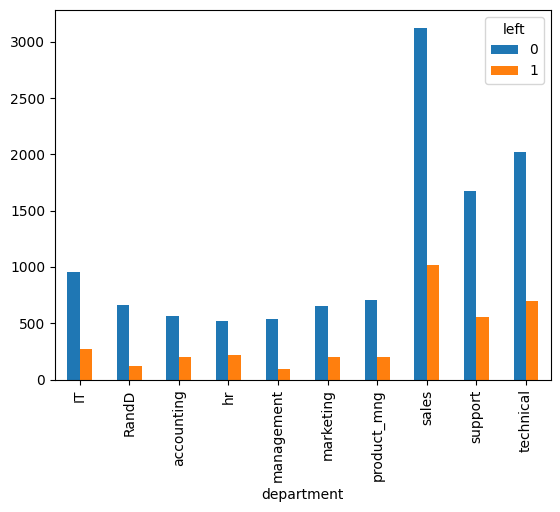

In [81]:
pd.crosstab(data.department, data.left).plot(kind='bar') #employee retention rate on department

In [88]:
indvar= data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
indvar.head() #independent features

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [90]:
devar= data[['last_evaluation','number_project','time_spend_company','left','department']]
devar.head() #dependent features

,last_evaluation,number_project,time_spend_company,left,department
0,0.53,2,3,1,sales
1,0.86,5,6,1,sales
2,0.88,7,4,1,sales
3,0.87,5,5,1,sales
4,0.52,2,3,1,sales


In [91]:
#dummies
salary_dummies = pd.get_dummies(indvar.salary, prefix='salary')
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [92]:
#concat salary_dummies with orignial dummies
data_with_dummies = pd.concat([indvar,salary_dummies], axis='columns')
data_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [93]:
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [95]:
data_with_dummies.drop('salary',axis='columns',inplace=True)
data_with_dummies.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [99]:
#assigning X is data_with_dummies
X = data_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [97]:
y = data.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [98]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [103]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [104]:
model.fit(X_train,y_train)

LogisticRegression()

In [106]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
model.score(X_test,y_test) #accuracy of the model

0.7766666666666666